# Assignment 3


### Relativity visualization and radiation

On this homework assignment, you will be responsible for importing all of the python packages you need for your calculations. You will also be responsible for making your plot axis labels large enough for me to read them easily. Please make sure to put units on your axes where appropriate.

Instead of defining your own constants, use the pre-programmed values from <tt>scipy.constants</tt>.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

plt.rcParams.update({"font.size":14, "axes.labelsize":14, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

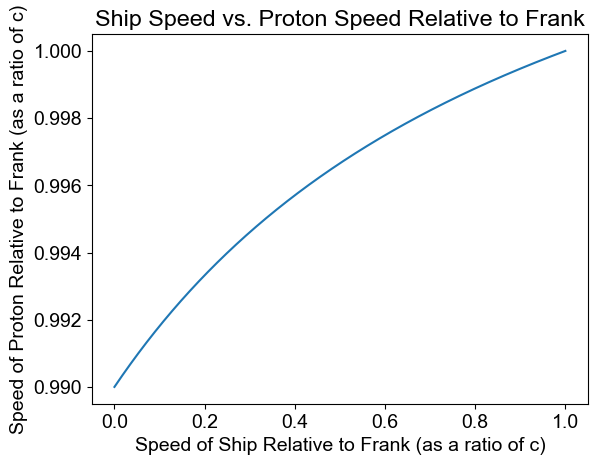

In [58]:
#Part a)

#let (up) be the speed of the protons with respect to Mary
#let (u) be the speed of the protons with respect to Frank
#Let (v) be Marys speed with respect to Frank

v = np.linspace(0, 1, 10000)
up = 0.99

#The equation for u, assuming everything is in the x-direction, is u = (up + v) / (1 + (v*up)/c)
#in order to be neater I have all of the velocities as ratios of c (ie (up c + v c) / (1 + (vc*upc)/c))

u = (up + v) / (1 + (up*v))

#Plot
plt.plot(v,u)
plt.title("Ship Speed vs. Proton Speed Relative to Frank")
plt.xlabel("Speed of Ship Relative to Frank (as a ratio of c)", fontsize = 14)
plt.ylabel("Speed of Proton Relative to Frank (as a ratio of c)", fontsize  = 14)

plt.show()


C:\Users\alexh\AppData\Local\Temp\ipykernel_28716\461065277.py:22: RuntimeWarning: divide by zero encountered in divide
  g = 1 / np.sqrt(1-(v**2))


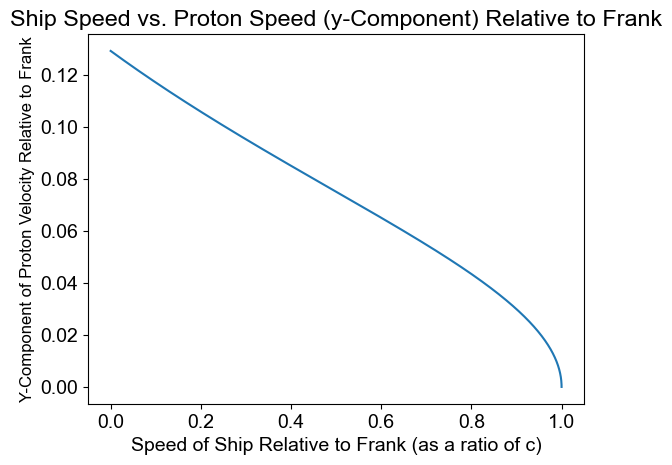

In [181]:
#Part B

#Note: It was unclear if the full angle of the cone was 15 or if the "half angle" from the axis of the cone to the edge was 15, I assumed that 7.5 was the angle of the axis to the edge

#let up be the speed of the proton seen by Mary
#let upx be the x-component of the proton velocity seen by Mary
#let upy be the x-component of the proton velocity seen by Mary
#let uy be the y-component of the proton velocity as seen by Frank

v = np.linspace(0, 1, 10000)
up = 0.99
angle  = 7.5
angle_rad = np.radians(angle)

#Proton Speed Relative to MAry
upx = up*np.cos(angle_rad)
upy = up*np.sin(angle_rad)

#gamma (g) calc, so we can use it to find uy
#I negelected the c^2 in this equation because v is already a ratio of c

g = 1 / np.sqrt(1-(v**2))


#uy calculation
uy = (upy) / (g*(1+(v*upx)))

#Plot
plt.plot(v,uy)
plt.title("Ship Speed vs. Proton Speed (y-Component) Relative to Frank")
plt.xlabel("Speed of Ship Relative to Frank (as a ratio of c)", fontsize = 14)
plt.ylabel("Y-Component of Proton Velocity Relative to Frank", fontsize  = 12)

plt.show()


<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

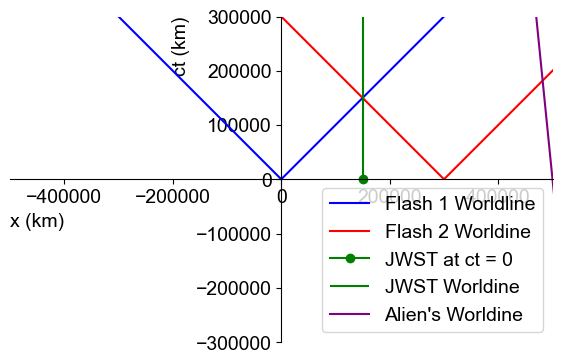

In [ ]:
x = np.linspace(-300000,300000,1000)

#Used code from last HW to make the axis look nice

fig, ax = plt.subplots(figsize=(7,7))

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_aspect('equal')
ax.set_xlim([-5e5, 5e5])
ax.set_ylim([-3e5, 3e5])

ax.set_xlabel("x (km)", loc = "left")
ax.set_ylabel("ct (km)", loc = "top")



#Plot the 0km and 300000km Flash Worldlines
#I didn't show the past portion of the lines because the event does not take place before ct = 0
ax.plot(x,np.abs(x), color = 'blue', label = "Flash 1 Worldline")
ax.plot(x+300000,np.abs(x), color = 'red', label = "Flash 2 Worldine")

#Plot the James Web Telescope Plot
#I had to look up how to make the veritcal line with axvline function
ax.plot(150000, 0, marker ='o', color = "green", label = "JWST at ct = 0")
ax.vlines(x=150000, ymin = 0, ymax = 300000, color = "green", label = "JWST Worldine")

#Aliens Worldine
#Slope is odd, -0.1 puts it under the boundary condition which is weird, so I used -1/0.1 and it looked correct based on what I know about worldlinesz
ax.plot(x + 500000, -(1/0.1)*x, color = "purple", label = "Alien's Worldine")

ax.legend(loc = "lower right")



<ol start=3>
    <li>Use Wien's displacement law, $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} \mathrm{m} \cdot \mathrm{K}}{T}$, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: <em>watch your units</em>.</li>
</ol>

O5 Wavelength of Maximum Intensity is  54 nm.
B5 Wavelength of Maximum Intensity is  191 nm.
A5 Wavelength of Maximum Intensity is  349 nm.
F5 Wavelength of Maximum Intensity is  433 nm.
G5 Wavelength of Maximum Intensity is  512 nm.
K5 Wavelength of Maximum Intensity is  659 nm.
M5 Wavelength of Maximum Intensity is  906 nm.


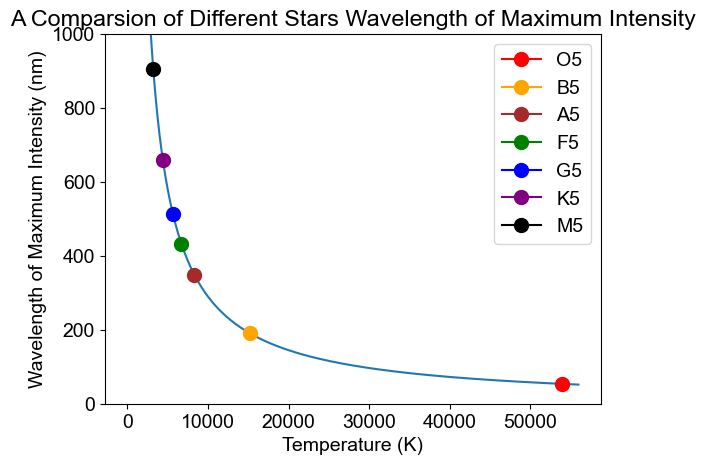

In [42]:
T = np.linspace(0.00001,56000,1000)

#Wien's Equation
lambda_max = (constants.Wien / T) * 10**(9)

#Calculation of Maximum Wavelengths
nm = 10**9

#O5
TO5 = 54000
lambda_O5 = (constants.Wien / TO5) * nm
print("O5 Wavelength of Maximum Intensity is ", round(lambda_O5), "nm.")

#B5
TB5 = 15200
lambda_B5 = (constants.Wien / TB5) * nm
print("B5 Wavelength of Maximum Intensity is ", round(lambda_B5), "nm.")

#A5
TA5 = 8310
lambda_A5 = (constants.Wien / TA5) * nm
print("A5 Wavelength of Maximum Intensity is ", round(lambda_A5), "nm.")

#F5
TF5 = 6700
lambda_F5 = (constants.Wien / TF5) * nm
print("F5 Wavelength of Maximum Intensity is ", round(lambda_F5), "nm.")

#G5
TG5 = 5660
lambda_G5 = (constants.Wien / TG5) * nm
print("G5 Wavelength of Maximum Intensity is ", round(lambda_G5), "nm.")

#K5
TK5 = 4400
lambda_K5 = (constants.Wien / TK5) * nm
print("K5 Wavelength of Maximum Intensity is ", round(lambda_K5), "nm.")

#M5
TM5 = 3200
lambda_M5 = (constants.Wien / TM5) * nm
print("M5 Wavelength of Maximum Intensity is ", round(lambda_M5), "nm.")


#Plot base plot
plt.plot(T,lambda_max)

#Plot the Points
plt.plot(TO5, lambda_O5, marker = 'o', markersize = '10', color = 'red', label = "O5")
plt.plot(TB5, lambda_B5, marker = 'o', markersize = '10', color = 'orange', label = "B5")
plt.plot(TA5, lambda_A5, marker = 'o', markersize = '10', color = 'brown', label = "A5")
plt.plot(TF5, lambda_F5, marker = 'o', markersize = '10', color = 'green', label = "F5")
plt.plot(TG5, lambda_G5, marker = 'o', markersize = '10', color = 'blue', label = "G5")
plt.plot(TK5, lambda_K5, marker = 'o', markersize = '10', color = 'purple', label = "K5")
plt.plot(TM5, lambda_M5, marker = 'o', markersize = '10', color = 'black', label = "M5")

plt.title("A Comparsion of Different Stars Wavelength of Maximum Intensity")
plt.xlabel("Temperature (K)")
plt.ylabel("Wavelength of Maximum Intensity (nm)")
plt.ylim(0,1000)
plt.legend()

plt.show()

In class we will describe the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=4>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

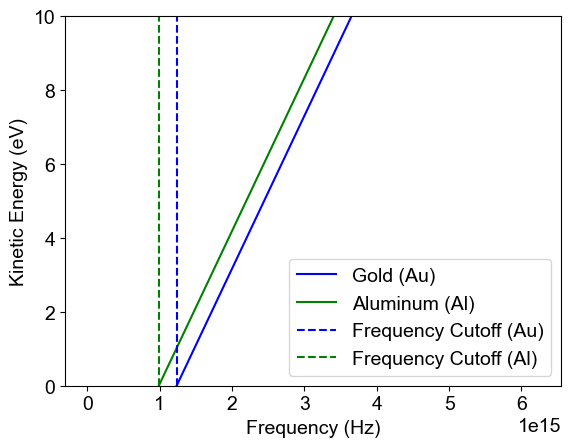

In [ ]:
#f is frequency
f = np.linspace(0,5e15,1000)

#wg is work function for gold and wa is a work function for aluminum
wg = 5.1
wa = 4.08

#find planks constant in ev (hev)
h = 6.6261*10**(-34)
hev = h / (1.602*10**(-19))

#K is kinetic energy
kg = (hev * f) - wg
ka = (hev * f) - wa

#Find cut-off frequency (fgc = cut off for gold, fac = cut off for aluminum)
fgc = wg / hev
fac = wa / hev

#Creat plots
plt.plot(f, kg, color = "blue", label ="Gold (Au)")
plt.plot(f, ka, color = "green", label ="Aluminum (Al)")
plt.plot(fgc)
plt.plot(fac)

#I did not know how to make asymptote so I approximated it this way
plt.plot(f+fgc,f*0.000001, color = "blue", linestyle = "--",label = "Frequency Cutoff (Au)" )
plt.plot(f+fac,f*0.000001, color = "green", linestyle = "--", label = "Frequency Cutoff (Al)")


plt.ylim(0,10)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Kinetic Energy (eV)")
plt.legend()

plt.show()

